# **Linear Algebra Personal Application Project: PCA Using the Iris Dataset**
[Julia Husainzada](https://www.linkedin.com/in/julia-husainzada/) | juliahusainzada@gmail.com

<img src="photos/pca_photo.webp" alt="PCA Thumbnail" width="500">
<img src="photos/iris.jpg" alt="Iris" width="500">



## Objective
Our goal is to use **Singular Value Decomposition** (SVD) to perform Principal Component Analysis (PCA) on the Iris dataset to explain the mathematical foundation and practical implementation of PCA using SVD, while providing intuitive visualizations to understand each step. By the end of this notebook, you will have a comprehensive understanding of:
	1.	How SVD decomposes a dataset into its core components.
	2.	How PCA uses these components for dimensionality reduction.
	3.	How data is transformed and reconstructed in lower-dimensional spaces.

#### *Why PCA with SVD?*

PCA is a widely-used technique for dimensionality reduction, allowing us to simplify datasets while retaining the most significant variance. SVD offers a powerful mathematical approach to compute PCA without explicitly constructing the covariance matrix.

#### Steps Covered in This Notebook
1. **Data Understanding & Preprocessing**: Load the Iris dataset, extract numerical features, and standardize the data to ensure fair variance analysis across features.
2. **Understanding SVD**: Decompose the standardized data matrix into three components ( U, S, V^T ) using SVD and explain their significance in PCA.
3. **Principal Axes (Eigenvectors)**: Identify the principal axes that represent directions of maximum variance and overlay them on the original dataset.
4. **Dimensionality Reduction**: Project the data onto the principal axes to compute the principal components.
5. **Data Reconstruction**: Reconstruct the data from the reduced dimensions and compare it with the original dataset to understand the trade-off between dimensionality reduction and data approximation.

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

## Step 1: Data Preprocessing

### Understanding Our Data

Here, we're importing the necessary libraries and loading the Iris dataset for analysis.

We're using the Iris Dataset ```Iris.csv``` that contains data on flower species and their features (sepal length, sepal width, petal length, petal width).

<img src="photos/data_understanding.png" alt="PCA Meme 1" width="500">


In [34]:
# Load the Iris dataset
df = pd.read_csv('Iris.csv')
print("There are " + str(df.shape[0]) + " flowers and " + str(df.shape[1]) + " possible features.")  # Shape of the dataset
print("\n There are 3 unique flower types: ") 
print(df['Species'].unique())
df.head() # Display the first 5 rows


There are 150 flowers and 6 possible features.

 There are 3 unique flower types: 
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


150 flowers may not seem like a lot, but imagine if we were processing 10,000… or 500,000, or even 1,000,000 samples!

When working with large datasets, using every single feature isn’t always ideal. In our case, we have 4 features (sepal length, sepal width, petal length, and petal width), but not every feature contributes significantly to the variability in the data. Some features might add little value while unnecessarily increasing computational cost and complexity.

To address this, we can use Principal Component Analysis (PCA). PCA reduces the dimensionality of the dataset by identifying the directions (principal components) that capture the most variance. By leveraging Singular Value Decomposition (SVD), PCA allows us to retain only the most impactful components, ensuring we preserve the essence of the data while saving time and computational resources.

<img src="photos/pca_meme1.png" alt="PCA Meme 1" width="350">
<img src="photos/pca_meme2.png" alt="PCA Meme 1" width="400">

### Extract Features and Label

- ```X```: Contains only numerical columns, which will be used for PCA (features: sepal length, sepal width, petal length, petal width).
- ```y```: The species names (categorical labels) are converted to numeric values using LabelEncoder for visualization purposes.

In [35]:
# Separate numerical features and labels
X = df.select_dtypes(include=['number'])  # Select only numeric columns
y = df['Species']  # Extract species names as labels

# Print shapes of features and labels
print("Shape of features data: " + str(X.shape))
print("Shape of label data: " + str(y.shape))

# Convert species names to numeric labels
le = LabelEncoder()
y = le.fit_transform(y)
print(y)
# Mapping:
# 0 for setosa
# 1 for versicolor
# 2 for virginica

Shape of features data: (150, 5)
Shape of label data: (150,)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [36]:
print(X.columns)

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')


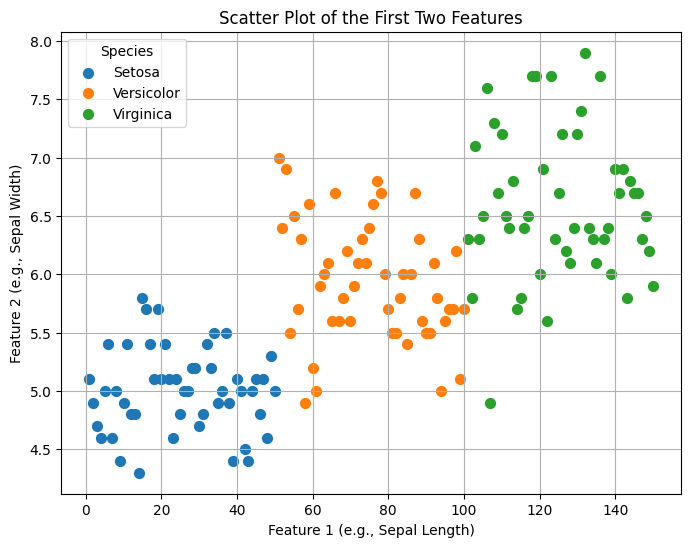

In [37]:
# Scatter plot of the first two features
plt.figure(figsize=(8, 6))

# Define species labels
species_labels = ['Setosa', 'Versicolor', 'Virginica']

# Plot each species separately
for species, label in enumerate(species_labels):
    plt.scatter(X[y == species].iloc[:, 0], X[y == species].iloc[:, 1], label=label, s=50)

# Add title, labels, and legend
plt.title("Scatter Plot of the First Two Features")
plt.xlabel("Feature 1 (e.g., Sepal Length)")
plt.ylabel("Feature 2 (e.g., Sepal Width)")
plt.legend(title="Species")
plt.grid()
plt.show()

### Standardize the Data

PCA is based on variance, so large-scale features would dominate otherwise. To avoids bias from features with larger magnitudes during PCA, it's good practice to standardize features to ensure a zero mean and unit variance. 


In [38]:
# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# Check standardized data
print("   Id     SL    SW    PL    PW")
np.set_printoptions(suppress=True, linewidth=150, precision=2)
print(X_std)

   Id     SL    SW    PL    PW
[[-1.72 -0.9   1.03 -1.34 -1.31]
 [-1.7  -1.14 -0.12 -1.34 -1.31]
 [-1.67 -1.39  0.34 -1.4  -1.31]
 [-1.65 -1.51  0.11 -1.28 -1.31]
 [-1.63 -1.02  1.26 -1.34 -1.31]
 [-1.61 -0.54  1.96 -1.17 -1.05]
 [-1.58 -1.51  0.8  -1.34 -1.18]
 [-1.56 -1.02  0.8  -1.28 -1.31]
 [-1.54 -1.75 -0.36 -1.34 -1.31]
 [-1.51 -1.14  0.11 -1.28 -1.44]
 [-1.49 -0.54  1.49 -1.28 -1.31]
 [-1.47 -1.26  0.8  -1.23 -1.31]
 [-1.44 -1.26 -0.12 -1.34 -1.44]
 [-1.42 -1.87 -0.12 -1.51 -1.44]
 [-1.4  -0.05  2.19 -1.46 -1.31]
 [-1.37 -0.17  3.11 -1.28 -1.05]
 [-1.35 -0.54  1.96 -1.4  -1.05]
 [-1.33 -0.9   1.03 -1.34 -1.18]
 [-1.3  -0.17  1.73 -1.17 -1.18]
 [-1.28 -0.9   1.73 -1.28 -1.18]
 [-1.26 -0.54  0.8  -1.17 -1.31]
 [-1.24 -0.9   1.49 -1.28 -1.05]
 [-1.21 -1.51  1.26 -1.57 -1.31]
 [-1.19 -0.9   0.57 -1.17 -0.92]
 [-1.17 -1.26  0.8  -1.06 -1.31]
 [-1.14 -1.02 -0.12 -1.23 -1.31]
 [-1.12 -1.02  0.8  -1.23 -1.05]
 [-1.1  -0.78  1.03 -1.28 -1.31]
 [-1.07 -0.78  0.8  -1.34 -1.31]
 [-1.05 -1.3

Let's visualize the standardized data...

/var/folders/cm/ndw7gpxs6qv3lsg9ygv10sqw0000gn/T/ipykernel_26580/3737051944.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_std[y == species, 0], X_std[y == species, 1], label=label, s=50, cmap='viridis')


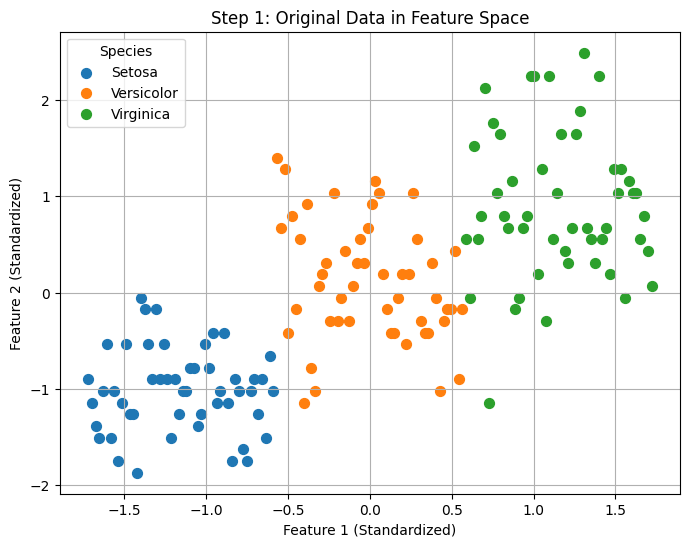

In [39]:
plt.figure(figsize=(8, 6))

# Define species labels
species_labels = ['Setosa', 'Versicolor', 'Virginica']

# Plot each species separately
for species, label in enumerate(species_labels):
    plt.scatter(X_std[y == species, 0], X_std[y == species, 1], label=label, s=50, cmap='viridis')

# Add title, labels, colorbar, and legend
plt.title("Step 1: Original Data in Feature Space")
plt.xlabel("Feature 1 (Standardized)")
plt.ylabel("Feature 2 (Standardized)")
plt.grid()
plt.legend(title="Species")
plt.show()

## Step 2: Performing SVD

SVD: Decomposes  ```X_std```  into U, Σ (singular values), and V^T:
- ```U``` : Left singular vectors (shape:  n x n, where n = 150).
- ```S``` : Singular values, related to variance explained by each component.
- ```V^T``` : Right singular vectors (shape:  d x d, where d = 4), where each row is an eigenvector (or principal axis). Transposing  V^T  makes the __columns__ of  V  represent these principal directions.

**V^T  gives the principal directions,  S  indicates their importance, and  U  helps reconstruct the data.**
The rows of  V^T  (or columns of  V ) define the directions of maximum variance in the data. Think of this as finding the best way to rotate the data so that the most variation is aligned with the axes. The singular values in  S  indicate how much each axis contributes to the data’s structure. Larger singular values mean more variance is captured along that axis. The columns of  U  describe where each data point lies in this new space (relative to the principal axes).

Enjoy this helpful explanation of SVD from Herman Kamper [here](https://www.youtube.com/watch?v=DQ_BkPHIl-g&t=2s).

<img src="photos/SVD_formula.png" alt="PCA Meme 1" width="500">



In [40]:
# Decompose X_std using SVD
U, S, Vt = np.linalg.svd(X_std)

##### ```U``` : Left Singular Vectors
- Rows represent individual data points in the dataset.
- Columns represent a new basis (set of axes) for the rows of  ```X_std```.
- Each column of  U  is a unit vector, and together, these columns form an orthogonal basis.

Role in PCA: U  aligns the data points with the principal components. If  ```X_reduced```  is obtained by projecting  ```X_std```  onto the first  k  principal components, the first  k  columns of  U  will represent the projections of the data points in the new space.

In [41]:
print(U)
print(U.shape)

[[-0.12  0.04  0.06 ...  0.12  0.12  0.11]
 [-0.11 -0.06  0.09 ...  0.06  0.11  0.16]
 [-0.12 -0.03  0.04 ...  0.07  0.16  0.1 ]
 ...
 [ 0.09  0.02 -0.11 ...  0.97 -0.03 -0.02]
 [ 0.09  0.08 -0.21 ... -0.02  0.95 -0.03]
 [ 0.07 -0.   -0.19 ... -0.02 -0.03  0.95]]
(150, 150)


##### ```S``` : Singular Values
- S  is a diagonal matrix (or sometimes a vector of values).
- The diagonal entries are the singular values, which measure the importance (or magnitude) of each principal direction.
- The singular values are proportional to the variance captured by each principal component.
- Larger singular values correspond to directions (principal components) that capture more variance in the data.

In [42]:
print(S)
print(S.shape)

[23.67 11.76  5.93  3.64  1.76]
(5,)


##### ```V^T``` : Right Singular Vectors
-  V^T  contains the eigenvectors of the covariance matrix of  ```X_std```.
- Rows Represent the principal directions (principal axes).
- Each row of  V^T  corresponds to one principal component, expressed as a combination of the original features.

Role in PCA:
- V^T  shows how to transform the original features into the principal component space.
- The columns of  V  (transpose of  V^T ) are the principal directions, which are orthogonal to one another.
- V^T  gives us the coefficients that describe the contribution of each original feature to the principal components.

In [43]:
print(Vt)
print(Vt.shape)

[[ 0.48  0.45 -0.23  0.51  0.5 ]
 [-0.02  0.38  0.92  0.03  0.07]
 [-0.67  0.65 -0.27  0.13 -0.19]
 [-0.56 -0.41  0.09  0.29  0.65]
 [ 0.01 -0.26  0.12  0.8  -0.53]]
(5, 5)


## Step 3: Compute Principal Components

### **What Are Principal Components?**

Imagine you have this dataset where each flower has measurements like sepal length, width, etc. Right now, this data lives in its original space, with each feature representing one of the axes. But what if we could find a way to reorganize this space so the data tells us more about the patterns inside it?

That’s what PCA does. It finds principal directions (called eigenvectors) where the data varies the most and projects the data onto these directions. The result is a new representation of the data, called the principal components, which capture as much of the important information as possible.

### ***How?*** Step-by-Step:
#### 1. **Original Data** ```X_std```
- Think of ```X_std``` as a table, where each row is a flower, and each column is a feature (like sepal length or petal width)
- Right now, all the data sits in this feature space. It’s like saying, “Here’s how the data looks relative to these features.”

#### 2. **Principal Directions** ```V```
PCA uses SVD to figure out these special directions called principal directions. Each of these directions (or eigenvectors) tells us the most important patterns in the data:
- The first direction is where the data spreads out the most (maximum variance).
- The second direction is where the next biggest spread happens, but it’s perpendicular to the first.
These directions act as a new set of axes for your data.

#### 3. **Projections** ```X_std @ V```
For every flower (or row in  X_std), we figure out how much of it lies along each principal direction. It’s like asking, “How much does this flower align with the first direction? The second?”
Mathematically, this happens by taking the dot product of the data with the principal directions, as demonstrated below. This gives us the principal components, which are the coordinates of your data in this new, rotated space.

##### ***What’s Really Happening?***

Think of it as rotating the data. Instead of looking at the data from the perspective of the original features, we’re now looking at it from the perspective of the directions where the data spreads out the most.
- The first axis (or principal component) shows the biggest spread of the data. That’s where the data spreads out the most, or in simpler terms, where the data shows the most interesting patterns.
- The second axis shows the next biggest spread, but it’s completely independent of the first.

This rotation doesn’t lose any information—it just reorganizes it.

##### ***Why Is This Useful?***

Let’s say you have 4 features in the Iris dataset. Maybe not all of them are equally important. PCA helps you figure out which directions (or combinations of features) really matter. By keeping only the top 2 principal components, you can:
- Simplify the data (fewer dimensions to work with).
- Focus on the important parts (directions with the most variance).
- Save time and computation while preserving the key patterns.

##### ***Why Are Principal Components Perpendicular?***

Principal components are orthogonal (perpendicular) because PCA ensures that each principal component captures unique, non-redundant information.
- If the principal components weren’t perpendicular, there could be overlap between them, meaning two components might be explaining the same part of the variance.
- Orthogonality means that each principal component adds something new to our understanding of the data.

In [44]:
# Transpose Vt to get V
V = Vt.T

# Compute principal components
principal_components = X_std @ V

# Display shape and a preview
print("Principal Components Shape:", principal_components.shape)
print(principal_components)

Principal Components Shape: (150, 5)
[[-2.82  0.51  0.37  0.19 -0.03]
 [-2.65 -0.65  0.51  0.16 -0.11]
 [-2.88 -0.32  0.21  0.28 -0.03]
 [-2.81 -0.58  0.19  0.32  0.06]
 [-2.88  0.67  0.17  0.21  0.03]
 [-2.59  1.52  0.24  0.28 -0.01]
 [-2.9   0.07 -0.08  0.42  0.03]
 [-2.71  0.24  0.25  0.14  0.02]
 [-2.79 -1.1   0.08  0.3   0.02]
 [-2.65 -0.45  0.36  0.01  0.04]
 [-2.62  1.07  0.33 -0.03 -0.02]
 [-2.75  0.15  0.04  0.2   0.13]
 [-2.64 -0.71  0.29 -0.02 -0.  ]
 [-2.99 -0.95 -0.14  0.17  0.02]
 [-2.61  1.88  0.37 -0.27 -0.19]
 [-2.65  2.71 -0.01  0.08 -0.05]
 [-2.59  1.51  0.04  0.07 -0.19]
 [-2.56  0.51  0.08  0.05 -0.09]
 [-2.3   1.43  0.37 -0.14 -0.06]
 [-2.67  1.15 -0.13  0.11  0.04]
 [-2.29  0.43  0.38 -0.19 -0.01]
 [-2.53  0.94 -0.13  0.15 -0.06]
 [-3.01  0.47 -0.46  0.11 -0.02]
 [-2.17  0.1   0.09  0.15 -0.15]
 [-2.51  0.15 -0.14  0.09  0.27]
 [-2.27 -0.61  0.23 -0.16 -0.04]
 [-2.34  0.26 -0.09  0.08 -0.07]
 [-2.43  0.54  0.03 -0.2  -0.01]
 [-2.4   0.32  0.07 -0.25 -0.08]
 [-2.4

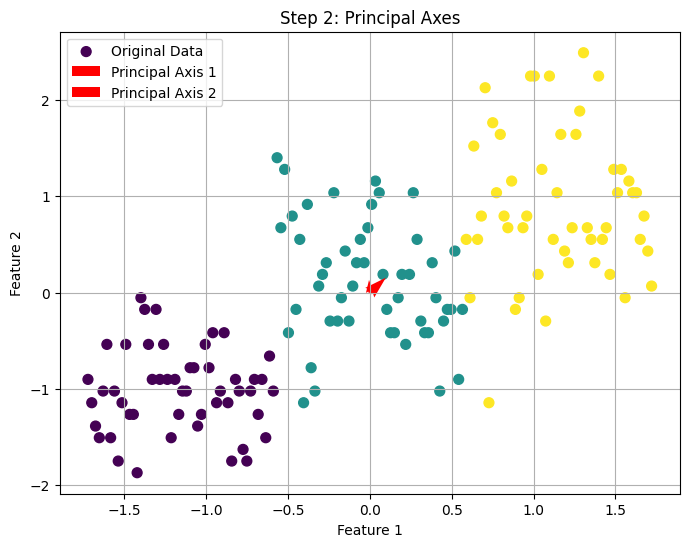

In [45]:
# Define the origin
origin = np.mean(X_std[:, :2], axis=0)  # Data mean
eigenvectors = V[:, :2]  # First 2 principal directions

# Plot the original data
plt.figure(figsize=(8, 6))
plt.scatter(X_std[:, 0], X_std[:, 1], c=y, cmap='viridis', s=50, label="Original Data")

# Add principal axes
for i in range(2):
    plt.quiver(origin[0], origin[1], eigenvectors[0, i], eigenvectors[1, i], 
               scale=3, scale_units='inches', color='red', label=f'Principal Axis {i+1}')

# Add title, labels, and legend
plt.title("Step 2: Principal Axes")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()

## Step 4: Reduce Dimensions

The first two components explain the most variance and provide the best 2D representation.

In [46]:
# Reduce dimensions to 2 principal components
# Select only the first  k  columns of the principal components matrix.
k = 2
X_reduced = principal_components[:, :k]
X_reduced

array([[-2.82,  0.51],
       [-2.65, -0.65],
       [-2.88, -0.32],
       [-2.81, -0.58],
       [-2.88,  0.67],
       [-2.59,  1.52],
       [-2.9 ,  0.07],
       [-2.71,  0.24],
       [-2.79, -1.1 ],
       [-2.65, -0.45],
       [-2.62,  1.07],
       [-2.75,  0.15],
       [-2.64, -0.71],
       [-2.99, -0.95],
       [-2.61,  1.88],
       [-2.65,  2.71],
       [-2.59,  1.51],
       [-2.56,  0.51],
       [-2.3 ,  1.43],
       [-2.67,  1.15],
       [-2.29,  0.43],
       [-2.53,  0.94],
       [-3.01,  0.47],
       [-2.17,  0.1 ],
       [-2.51,  0.15],
       [-2.27, -0.61],
       [-2.34,  0.26],
       [-2.43,  0.54],
       [-2.4 ,  0.32],
       [-2.49, -0.33],
       [-2.37, -0.5 ],
       [-2.09,  0.44],
       [-2.77,  1.81],
       [-2.61,  2.16],
       [-2.37, -0.46],
       [-2.38, -0.2 ],
       [-2.23,  0.67],
       [-2.34, -0.47],
       [-2.53, -0.9 ],
       [-2.3 ,  0.27],
       [-2.39,  0.45],
       [-2.01, -2.34],
       [-2.6 , -0.48],
       [-2.

In [47]:
# Print reduced data
print("Before Reduction: ", principal_components.shape)
print("Reduced Data Shape:", X_reduced.shape)

Before Reduction:  (150, 5)
Reduced Data Shape: (150, 2)


When we select only the first 2 components, each sample is now represented by 2 components instead of 5.

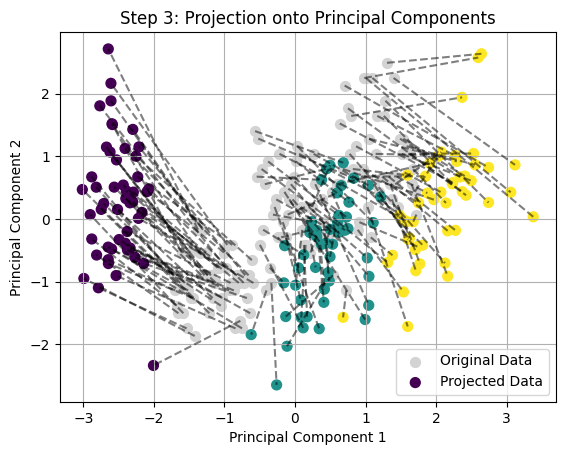

In [48]:
# Project data onto first 2 principal components
projection = X_std @ V[:, :2]

plt.scatter(X_std[:, 0], X_std[:, 1], c='lightgray', s=50, label='Original Data')
plt.scatter(projection[:, 0], projection[:, 1], c=y, cmap='viridis', s=50, label='Projected Data')

# Add projection lines
for i in range(X_std.shape[0]):
    plt.plot([X_std[i, 0], projection[i, 0]], [X_std[i, 1], projection[i, 1]], 'k--', alpha=0.5)

plt.title("Step 3: Projection onto Principal Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid()
plt.show()

## Step 5: Reconstruct Data

#### Now, we're projecting the reduced data back to the original space using the first two principal components. An approximation of the original data will result while reducing dimensionality.

Why are we doing this? The reconstructed data ```X_reconstructed``` allows us to compare how much information was lost during dimensionality reduction. Even though it has 5 features (columns), the data reflects only the patterns captured by the first 2 principal components.

*What's happening?*

**1. Reduced Data ```X_reduced```**:
- After PCA,  X_{\text{reduced}}  is a matrix of shape  (n, 2) , where 
    - n = Number of samples (e.g., 150 for the Iris dataset)
    - 2 : Number of principal components we kept
- This matrix contains the data represented in terms of the first two principal components (a simpler, lower-dimensional representation).

**2. Principal Axes ```V[:, :2]```**:
- The matrix ```V[:, :2]``` contains the first two principal directions (eigenvectors of the original feature space).
- Each eigenvector is a linear combination of the original features.
- Shape of ```V[:, :2]``` :  (5, 2) , where:
    - 5 : Original number of features.
    - 2 : Number of principal components retained.

**3. Matrix Multiplication** 
- ```X_reduced``` shape (n, 2)
- ```V[:, :2].T``` shape (2, 5)
- ```X_reconstructed``` shape (n x 5), **which matches the original dataset shape**


In [53]:
print(X_reduced.shape, "*", V[:, :2].T.shape, " = ", X_reconstructed.shape)

(150, 2) * (2, 5)  =  (150, 5)


In [51]:
# Reconstruct data using the reduced components
X_reconstructed = X_reduced @ V[:, :2].T

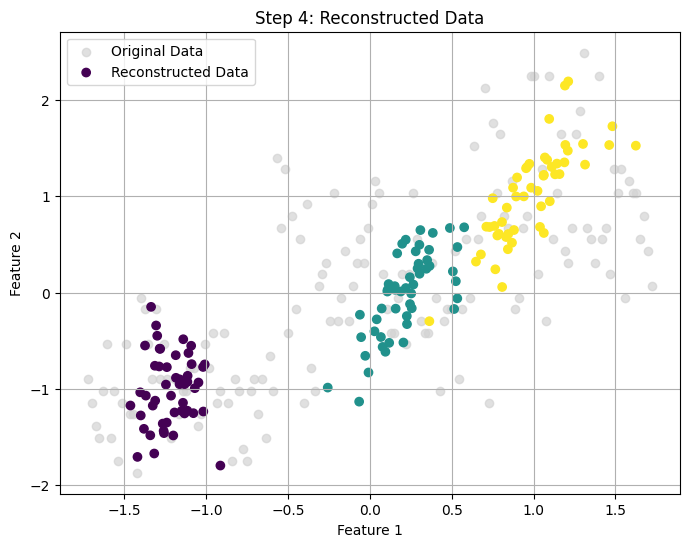

In [52]:
# Visualize the reconstruction
plt.figure(figsize=(8, 6))
plt.scatter(X_std[:, 0], X_std[:, 1], c='lightgray', label="Original Data", alpha=0.7)
plt.scatter(X_reconstructed[:, 0], X_reconstructed[:, 1], c=y, cmap='viridis', label="Reconstructed Data")
plt.title("Step 4: Reconstructed Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()

*The reconstructed data in this visualization demonstrates something remarkable: despite reducing the dataset’s dimensions and effectively “removing” certain features, the structure of the original data is largely preserved! This is because PCA focuses on retaining the most important components of variance, which capture the core patterns and relationships within the dataset. The primary clusters corresponding to the three species (Setosa, Versicolor, and Virginica) remain distinct and clearly separable in the reconstructed data. This preservation highlights how PCA efficiently compresses high-dimensional data into fewer dimensions without sacrificing the underlying structure. While some fine details are inevitably lost during the dimensionality reduction process, the reconstructed data still reflects the dominant trends, making it a powerful tool for understanding and visualizing complex datasets.*

## Next Steps

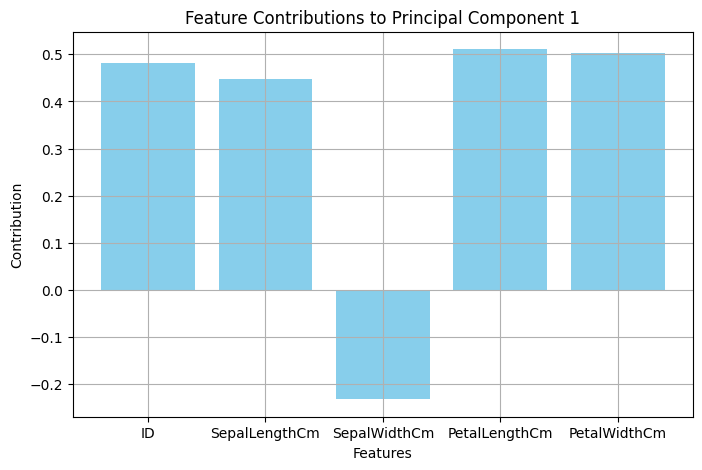

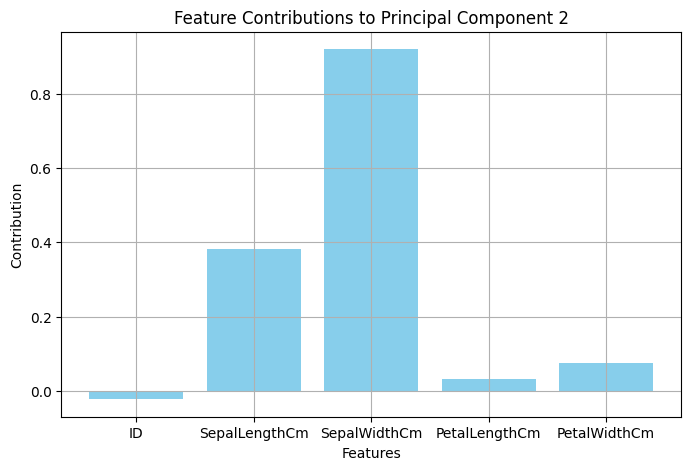

In [68]:
original_features = ["ID", "SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]

# Plot contributions for each principal component
for i in range(2):  # For PC1 and PC2
    plt.figure(figsize=(8, 5))
    plt.bar(original_features, V[:, i], color='skyblue')
    plt.title(f"Feature Contributions to Principal Component {i+1}")
    plt.xlabel("Features")
    plt.ylabel("Contribution")
    plt.grid()
    plt.show()

### **Analysis of Feature Contributions to Principal Components**

The bar charts show how the original features contribute to the first two principal components (PC1 and PC2). These contributions help us interpret what each principal component represents.

#### Principal Component 1 (PC1)
- **Main Contributors**: PetalLengthCm, PetalWidthCm, and SepalLengthCm have high positive contributions.
- **Meaning**: PC1 primarily captures patterns related to petal size. SepalWidthCm contributes negatively, meaning it varies inversely with PC1.

#### Principal Component 2 (PC2)
- **Main Contributor**: SepalWidthCm dominates with a very high positive contribution, followed by SepalLengthCm with a smaller positive contribution.
- **Meaning**: PC2 represents patterns related to sepal width, with minimal influence from petal-related features.

#### Overall Insights
1. **PC1**: Represents petal size patterns, influenced mostly by PetalLengthCm and PetalWidthCm.
2. **PC2**: Represents sepal width patterns, dominated by SepalWidthCm.
3. **Dimensionality Reduction**: PCA simplifies the dataset by preserving the key patterns, making it easier to analyze and visualize species relationships.

In [57]:
reduced_columns = [f"PC{i+1}" for i in range(X_reduced.shape[1])]
X_reduced_df = pd.DataFrame(X_reduced, columns=reduced_columns)

# Add labels if available
y_df = pd.DataFrame(y, columns=["Label"])  # Assuming `y` contains class labels

# Combine reduced data and labels into a single dataset
new_dataset = pd.concat([X_reduced_df, y_df], axis=1)

# View the new dataset
new_dataset.head()

,PC1,PC2,Label
0,-2.816339,0.506051,0
1,-2.645527,-0.651799,0
2,-2.879481,-0.321036,0
3,-2.810934,-0.577363,0
4,-2.879884,0.670468,0


## **Conclusion**
In this project, we explored how Principal Component Analysis (PCA), implemented using Singular Value Decomposition (SVD), can reduce the dimensionality of the Iris dataset while preserving most of its variance. By projecting the data onto the principal components, we simplified the dataset from four dimensions to two, allowing us to visualize and understand the underlying structure of the data more effectively. This process highlighted how PCA captures the most meaningful patterns in the data while discarding less significant noise or redundancy. 

Beyond this project, PCA remains a powerful tool with applications across many fields:
1. **Data Preprocessing**: PCA can reduce the computational cost of machine learning models by simplifying high-dimensional datasets.
2. **Image Compression**: In computer vision, PCA can reduce the storage requirements of images by representing them with fewer principal components, retaining only the most important visual details.
3. **Natural Language Processing (NLP)**: PCA can be used to reduce the dimensionality of text embeddings, such as word vectors, enabling faster and more efficient text classification or sentiment analysis.

***PCA is more than just a mathematical tool; it is a bridge between high-dimensional chaos and interpretable simplicity, enabling innovation in science, business, and technology!***

<img src="photos/pca_meme3.jpg" alt="PCA Meme 1" width="500">


# *Author's Notes*: **My Personal Connection**

### 1. **My Personal Interest/Career Path**

Linear Algebra has always interested me because of its connection to the world of data science and machine learning. I get really excited about analyzing data and uncovering meaningful insights that drive impactful decisions. With the right tools, numbers reveal amazing stories and patterns.

Numbers are intuitive, interpretable, and full of meaning. They allow us to describe, quantify, and even predict the behavior of complex systems, whether it’s understanding customer preferences, optimizing processes, or forecasting trends. This beauty behind numbers inspires my curiosity and fuels my passion for exploring fields like artificial intelligence and machine learning.

Taking this Linear Algebra class feels like a natural extension of my journey as it provides the mathematical foundation for many of the tools I use in data science.

### 2. **Application Area**
In this project, I discover my strong friendship with Principal Component Analysis (PCA)! As someone who frequently works with large datasets that contain numerous features, PCA can help me simplify these datasets by reducing their dimensionality without losing much meaningful information.

For example, in machine learning projects, we often encounter datasets with hundreds or thousands of features. Not all of these features are equally important—some may be redundant, while others add noise to the model. PCA, built on the principles of Linear Algebra, allows us to extract the most significant patterns in the data by identifying the directions of maximum variance. By projecting the data onto these principal components, we can work with a simpler, more interpretable representation of the data, leading to faster computations and better model performance.

PCA excites me because it not only makes data easier to work with but also highlights the hidden structures and relationships within the data. This goes hand-in-hand with my love for uncovering meaningful insights and using data to solve real-world problems.

### 3. **Linear Algebra Techniques Used**

Linear Algebra is the backbone of many data science techniques, especially PCA. In this application, I use tools such as **matrices**, **eigenvalues**, **eigenvectors**, and **SVD**, which are central concepts in this class. These tools fascinate me because they highlight the elegance of Linear Algebra in solving complex, high-dimensional problems.